In [1]:
import pandas as pd
import seaborn as sns

## The columns present in the dataset are:
##### total: Total number of crashes per billion miles.
##### speeding: Number of crashes involving speeding per billion miles.
##### alcohol: Number of crashes involving alcohol per billion miles.
##### not_distracted: Percentage of drivers not distracted.
##### no_previous: Percentage of drivers with no previous crashes.
##### ins_premium: Average insurance premium in the state.
##### ins_losses: Total insurance losses in the state.
##### abbrev: Abbreviation of the state name

In [2]:
df=sns.load_dataset("car_crashes")
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [4]:
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


# Generalized Scaling
## x/max(column x)

In [5]:
df.speeding.head(20)

0     7.332
1     7.421
2     6.510
3     4.032
4     4.200
5     5.032
6     4.968
7     6.156
8     2.006
9     3.759
10    2.964
11    9.450
12    5.508
13    4.608
14    3.625
15    2.669
16    4.806
17    4.066
18    7.175
19    5.738
Name: speeding, dtype: float64

In [6]:
df.speeding.max()

np.float64(9.45)

In [7]:
df.speeding/df.speeding.max()

0     0.775873
1     0.785291
2     0.688889
3     0.426667
4     0.444444
5     0.532487
6     0.525714
7     0.651429
8     0.212275
9     0.397778
10    0.313651
11    1.000000
12    0.582857
13    0.487619
14    0.383598
15    0.282434
16    0.508571
17    0.430265
18    0.759259
19    0.607196
20    0.449735
21    0.199577
22    0.358095
23    0.233651
24    0.279365
25    0.732593
26    0.883175
27    0.204974
28    0.575556
29    0.429630
30    0.189630
31    0.369947
32    0.416508
33    0.693333
34    0.581693
35    0.417778
36    0.673862
37    0.446984
38    0.962963
39    0.399365
40    0.961058
41    0.636402
42    0.433333
43    0.821164
44    0.514180
45    0.431746
46    0.255344
47    0.471111
48    0.856296
49    0.525714
50    0.773333
Name: speeding, dtype: float64

In [8]:
# Apply generalized scaling to the speeding column
df['scaled_speeding'] = df.speeding / df.speeding.max()

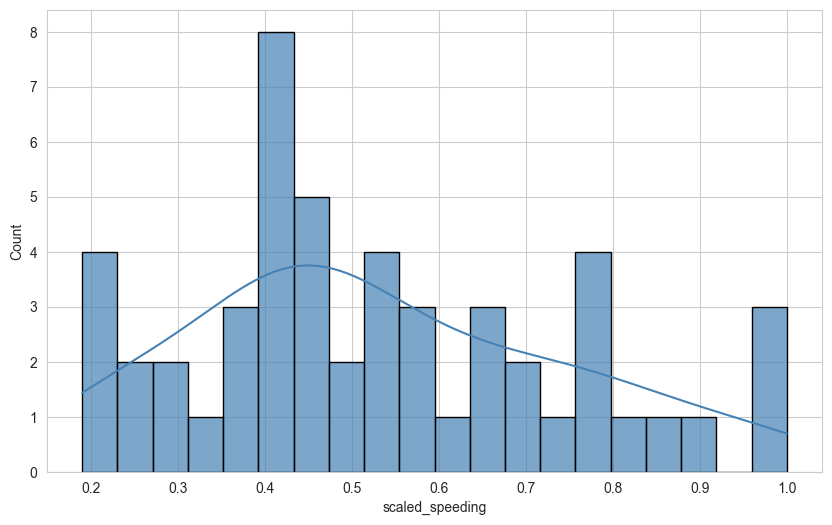

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a beautiful histogram with seaborn
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the histogram
ax = sns.histplot(
    data=df,
    x='scaled_speeding',
    bins=20,
    kde=True,
    color='steelblue',
    edgecolor='black',
    alpha=0.7
)


array([<Axes: ylabel='Frequency'>], dtype=object)

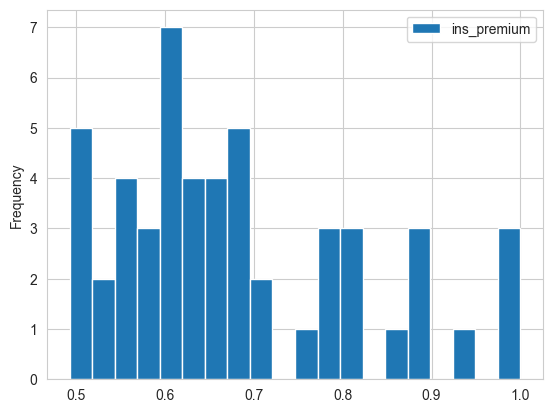

In [19]:
pd.DataFrame(df.ins_premium/df.ins_premium.max()).plot(kind='hist', bins=20, subplots=True)

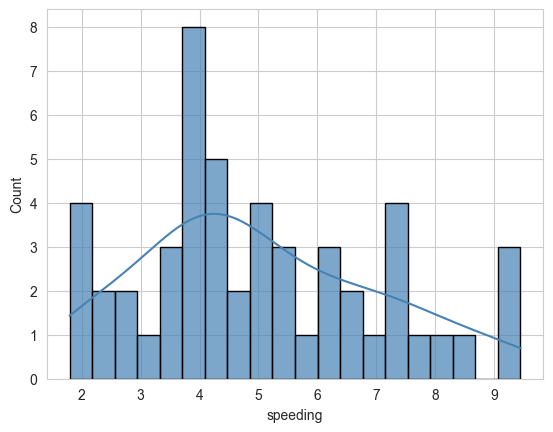

In [13]:
ay = sns.histplot(
    data=df,
    x='speeding',
    bins=20,
    kde=True,
    color='steelblue',
    edgecolor='black',
    alpha=0.7
)

# Standard Scaling
#### z-score = (x-mean)/std

In [14]:
df.std(numeric_only=True)

total                4.122002
speeding             2.017747
alcohol              1.729133
not_distracted       4.508977
no_previous          3.764672
ins_premium        178.296285
ins_losses          24.835922
scaled_speeding      0.213518
dtype: float64

In [15]:
df.speeding.mean(),df.speeding.min(),df.speeding.max(),df.speeding.max(),df.speeding.std()

(np.float64(4.998196078431373),
 np.float64(1.7919999999999998),
 np.float64(9.45),
 np.float64(9.45),
 np.float64(2.0177470903917354))

#### import pandas
#### pandas.DataFrame

#### import pandas as pd
#### pd.DataFrame

#### from pandas import DataFrame
#### direct name

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
ss=StandardScaler()

In [34]:
df.head(3)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,scaled_speeding
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,0.775873
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,0.785291
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,0.688889


In [23]:
df.tail(3)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,scaled_speeding
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV,0.856296
49,13.8,4.968,4.554,5.382,11.592,670.31,106.62,WI,0.525714
50,17.4,7.308,5.568,14.094,15.660,791.14,122.04,WY,0.773333


In [36]:
fitted_transform = ss.fit_transform(df[['speeding', 'alcohol', 'not_distracted', 'no_previous', 'ins_premium', 'ins_losses']])
fitted_transform.shape

(51, 6)

In [37]:
pd.DataFrame(fitted_transform, columns=['speeding', 'alcohol', 'not_distracted', 'no_previous', 'ins_premium', 'ins_losses'])

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,1.168148,0.439938,1.002301,0.277692,-0.580083,0.430514
1,1.212695,-0.211311,0.608532,0.807258,0.943258,-0.022900
2,0.756709,0.187615,0.459357,1.033141,0.070876,-0.981778
3,-0.483614,0.547408,1.676052,1.951700,-0.337701,0.321125
4,-0.399524,-0.891763,-0.594276,-0.891968,-0.048418,1.266178
5,0.016920,-0.630095,-0.633698,-0.291042,-0.291479,0.220276
6,-0.015114,-0.583369,-0.935632,-1.381293,1.029641,1.322702
7,0.579520,-0.015644,0.116657,0.545426,1.421281,0.690769
8,-1.497695,-1.923831,-1.718689,-2.174301,2.191759,0.063310
9,-0.620259,0.177686,0.648402,0.756823,1.547371,0.393915


In [29]:
fitted_transform = ss.fit_transform(df[['speeding']])
print(fitted_transform)

[[ 1.1681476 ]
 [ 1.2126951 ]
 [ 0.75670887]
 [-0.48361373]
 [-0.39952407]
 [ 0.01692   ]
 [-0.01511416]
 [ 0.57951992]
 [-1.49769509]
 [-0.62025945]
 [-1.01818377]
 [ 2.22827806]
 [ 0.25517406]
 [-0.1953063 ]
 [-0.68733097]
 [-1.16584122]
 [-0.09620062]
 [-0.46659559]
 [ 1.0895638 ]
 [ 0.37029682]
 [-0.37449738]
 [-1.55775914]
 [-0.8079596 ]
 [-1.39658727]
 [-1.1803567 ]
 [ 0.9634293 ]
 [ 1.67568881]
 [-1.53223192]
 [ 0.22063723]
 [-0.46959879]
 [-1.60480931]
 [-0.75189982]
 [-0.53166497]
 [ 0.77773129]
 [ 0.24966819]
 [-0.52565857]
 [ 0.68563308]
 [-0.38751126]
 [ 2.05309125]
 [-0.61275144]
 [ 2.04408164]
 [ 0.50844413]
 [-0.45208011]
 [ 1.38237604]
 [-0.06967233]
 [-0.45958812]
 [-1.29397786]
 [-0.27338956]
 [ 1.54855324]
 [-0.01511416]
 [ 1.15613479]]


<Figure size 1000x600 with 0 Axes>

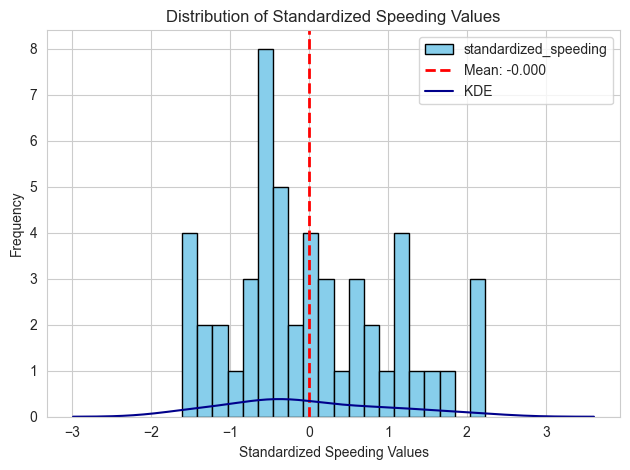

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have:
# fitted_transform = ss.fit_transform(df[['speeding']])

# Convert the numpy array to a pandas DataFrame for easier plotting
transformed_df = pd.DataFrame(fitted_transform, columns=['standardized_speeding'])

# Create a histogram using pandas plot function
plt.figure(figsize=(10, 6))
transformed_df.plot(
    kind='hist',
    bins=20,
    color='skyblue',
    edgecolor='black',
    title='Distribution of Standardized Speeding Values',
    legend=False,
    grid=True
)

plt.xlabel('Standardized Speeding Values')
plt.ylabel('Frequency')

# Add a vertical line at mean (should be approximately 0)
plt.axvline(transformed_df['standardized_speeding'].mean(),
            color='red',
            linestyle='dashed',
            linewidth=2,
            label=f'Mean: {transformed_df["standardized_speeding"].mean():.3f}')

# Add a kde plot on top of histogram
sns.kdeplot(transformed_df['standardized_speeding'], color='darkblue', label='KDE')

plt.legend()
plt.tight_layout()
plt.show()

## MinMaxScaler
#### Normalization x-x(min)/[x(max)-x(min)]

In [39]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [41]:
print(mms.fit_transform(df[['speeding', 'alcohol', 'not_distracted', 'no_previous', 'ins_premium', 'ins_losses']]))

[[0.72342648 0.47921847 0.74371033 0.59427828 0.21618958 0.55636883]
 [0.73504832 0.34718769 0.66344003 0.72262679 0.62393111 0.45684192]
 [0.61608775 0.42806394 0.63303046 0.77737321 0.39042695 0.24636258]
 [0.29250457 0.50100651 0.88105566 1.         0.28106617 0.5323574 ]
 [0.31444241 0.20923623 0.41824574 0.31079324 0.35849657 0.73980184]
 [0.42308697 0.26228538 0.41020958 0.45643693 0.29343805 0.51022048]
 [0.41472969 0.27175844 0.34865988 0.19219766 0.64705258 0.75220923]
 [0.56986158 0.38685613 0.56317063 0.65916775 0.75188004 0.61349638]
 [0.02794463 0.         0.18903246 0.         0.95810844 0.47576542]
 [0.25685558 0.42605092 0.67156751 0.71040312 0.78562981 0.54833527]
 [0.15304257 0.2731794  0.5963198  0.55968791 0.41116805 0.53601714]
 [1.         0.66098283 0.5748596  0.60630689 0.3323731  0.34071231]
 [0.48524419 0.33676732 0.51344687 0.59128739 0.         0.        ]
 [0.36772003 0.32670219 0.46901968 0.4153446  0.24432955 0.50343658]
 [0.23935753 0.30929544 0.54860509

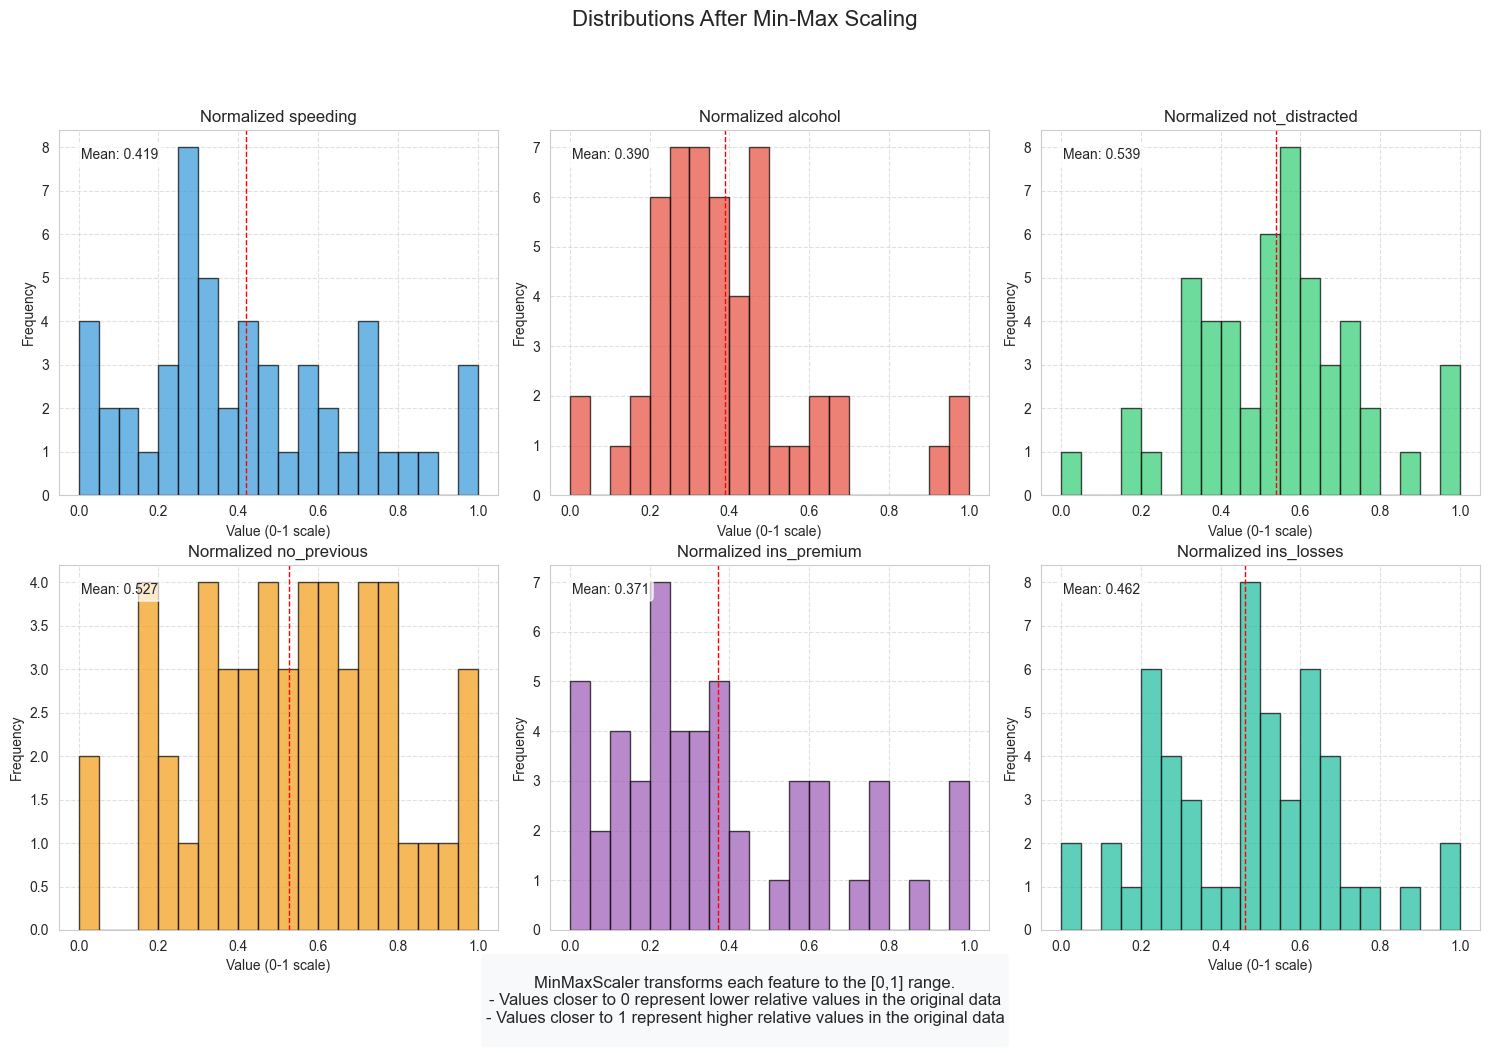

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame with the required columns
# Define the scaler
mms = MinMaxScaler()

# Columns to transform
columns = ['speeding', 'alcohol', 'not_distracted', 'no_previous', 'ins_premium', 'ins_losses']

# Apply the scaler
scaled_data = mms.fit_transform(df[columns])

# Convert to DataFrame for easier plotting
scaled_df = pd.DataFrame(scaled_data, columns=columns)

# Create subplots - 2 rows, 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten to easily iterate

# Color palette for the histograms
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

# Plot histograms for each column
for i, column in enumerate(columns):
    axes[i].hist(scaled_df[column], bins=20, color=colors[i], edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Normalized {column}')
    axes[i].set_xlabel('Value (0-1 scale)')
    axes[i].set_ylabel('Frequency')

    # Add mean line
    mean_val = scaled_df[column].mean()
    axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=1)
    axes[i].text(0.05, 0.95, f'Mean: {mean_val:.3f}', transform=axes[i].transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

    # Add grid for better readability
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.suptitle('Distributions After Min-Max Scaling', fontsize=16, y=1.02)

# Add an overall description
description = """
MinMaxScaler transforms each feature to the [0,1] range.
- Values closer to 0 represent lower relative values in the original data
- Values closer to 1 represent higher relative values in the original data
"""
fig.text(0.5, -0.01, description, ha='center', fontsize=12, bbox=dict(boxstyle='round', facecolor='#f8f9fa'))

plt.subplots_adjust(top=0.9, bottom=0.1)
plt.show()